**Описание проекта**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Описание данных**

Данные для работы находятся в нескольких таблицах.

market_file.csv - Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

market_money.csv - Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

market_time.csv - Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

money.csv - Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

## Загрузка данных

In [1]:
!pip install shap
!pip install scikit-learn==1.1.3
!pip install shap -q
!pip install --upgrade scikit-learn

  Using cached scikit_learn-1.1.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Using cached scikit_learn-1.6.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import shap
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier #добавляем импорт для новой модели



In [3]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=",")

In [4]:
#выведем первые строки каждого набора данных и общую инфомацию
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [5]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [6]:
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [7]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [8]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [9]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [10]:
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [11]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Все данные загружены. Названия столбцов совпадают с описанием. Пропусков нет. Переходим к предобработке.

## Предобработка данных

In [12]:
#проверяем наличие пропущенных значений и дубликатов в датафреймах
market_file.isnull().sum()

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

In [13]:
#проверяем наличие неявных дубликатов
market_file['Тип сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [14]:
#исправим дубликаты
market_file['Тип сервиса'] = market_file['Тип сервиса'].replace('стандартт', 'стандарт')
market_file['Тип сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [15]:
market_money.isnull().sum()

id         0
Период     0
Выручка    0
dtype: int64

In [16]:
market_time.isnull().sum()

id        0
Период    0
минут     0
dtype: int64

In [17]:
#проверяем наличие неявных дубликатов
market_time['Период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [18]:
#исправим опечатку
market_time['Период'] = market_time['Период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
market_time['Период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

In [19]:
money.isnull().sum()

id         0
Прибыль    0
dtype: int64

In [20]:
#функция для преобразования имен столбцов в змеиной регистр
def to_snake_case(name):
    return name.str.lower().str.replace(' ', '_').str.replace('-', '_')

#применение функции ко всем датафреймам
market_file.columns = to_snake_case(market_file.columns)
market_money.columns = to_snake_case(market_money.columns)
market_time.columns = to_snake_case(market_time.columns)
money.columns = to_snake_case(money.columns)

#проверяем
print(market_file.head())
print(market_money.head())
print(market_time.head())
print(money.head())

       id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей             

Дубликатов не обнаружено. Названия столбцов можно оставить кириллическими по заданию.

## Исследовательский анализ данных


In [21]:
#проведем статистический анализ всех признаков, построим графики для каждого признака
market_file.describe()

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


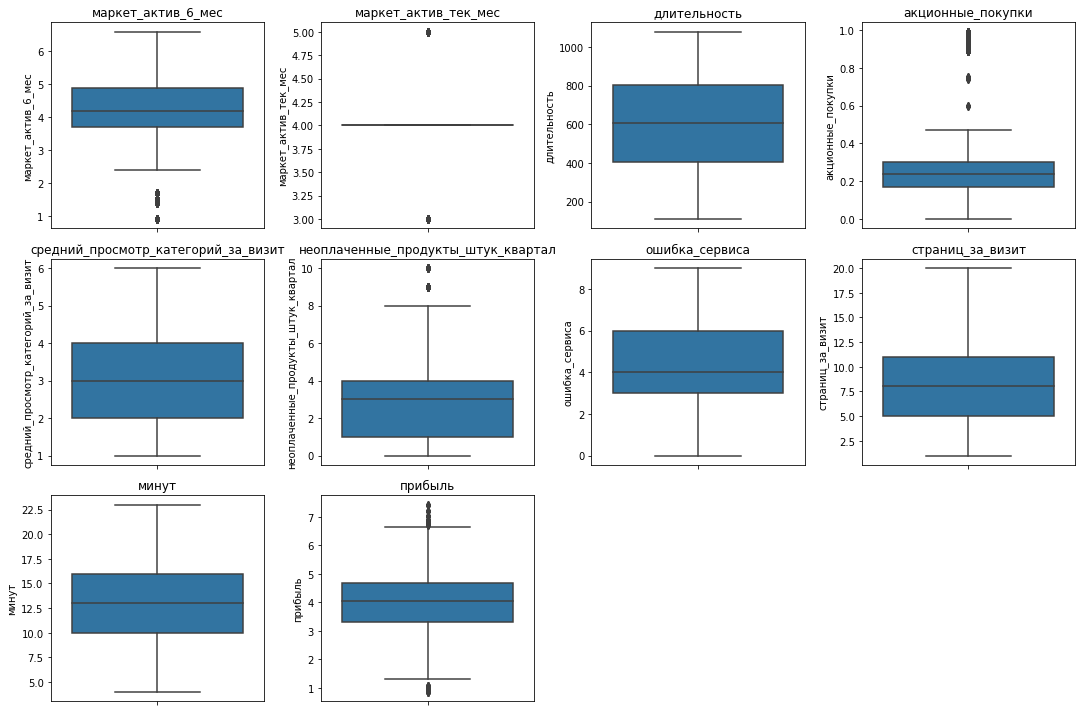

In [22]:
#слияние данных на основе 'id' для удобства
data = market_file.merge(market_money, on='id', how='left').merge(market_time, on='id', how='left').merge(money, on='id', how='left')

#выбор переменных для построения ящиков с усами
variables = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит',
    'минут',
    'прибыль'
]

#построение
plt.figure(figsize=(15, 10))
for i, variable in enumerate(variables, 1):
    plt.subplot(3, 4, i)  
    sns.boxplot(y=data[variable])
    plt.title(variable)

plt.tight_layout()
plt.show()

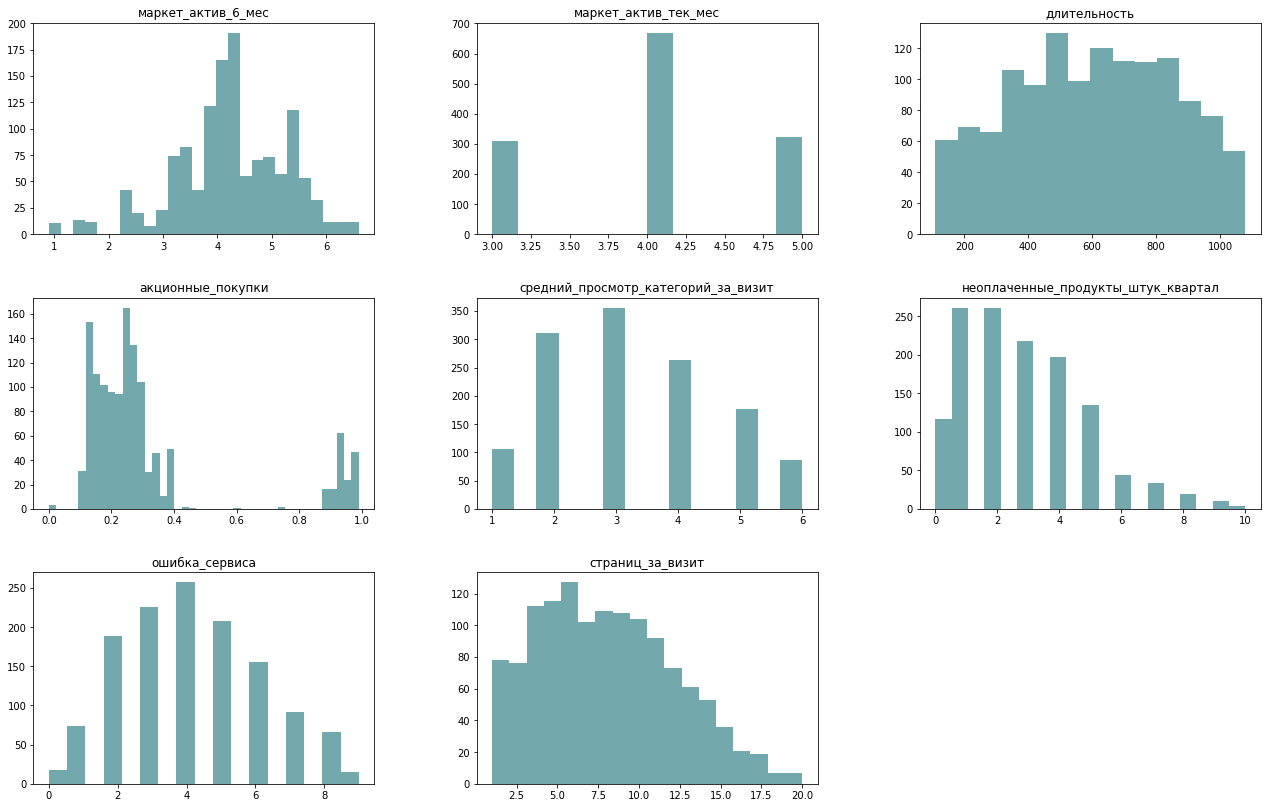

In [23]:
#визуализация
market_file[market_file.columns[market_file.columns != 'id']].hist(figsize=(22, 14), grid= False, color = '#73A9AD', bins='auto')
plt.show()

Признаки: Маркет_актив_6_мес, Длительность, Средний_просмотр_категорий_за_визит, Ошибка_сервиса, Страниц_за_визит, Маркет_актив_тек_мес имеют нормальное распределение. Признаки Маркет_актив_тек_мес, Неоплаченные_продукты_штук_квартал и Ошибка_сервиса в дальнейшем можем преобразовать в категориальные. По визуализации признака Акционные_покупки можем сделать предположение, что довольно большая доля покупателей покупает товары именно по акции.

In [24]:
market_money.describe()

,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


<AxesSubplot:>

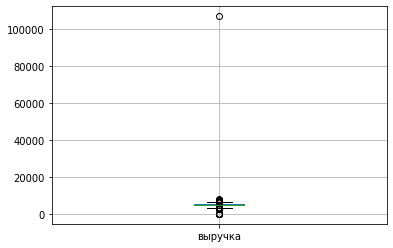

In [25]:
#максимальное значение количественного признака Выручка кажется аномальным, исследуем его подробнее
market_money.boxplot('выручка')

In [26]:
#избавимся от аномалии
market_money[market_money['выручка'] > 10000]

,id,период,выручка
98,215380,текущий_месяц,106862.2


In [27]:
market_money = market_money[market_money['выручка'] < 10000]
market_money.describe()

,id,выручка
count,3899.000000,3899.00000
mean,215997.658374,4999.57743
std,375.243472,706.99988
min,215348.000000,0.00000
25%,215673.000000,4590.10000
50%,215998.000000,4957.00000
75%,216322.500000,5363.00000
max,216647.000000,7799.40000


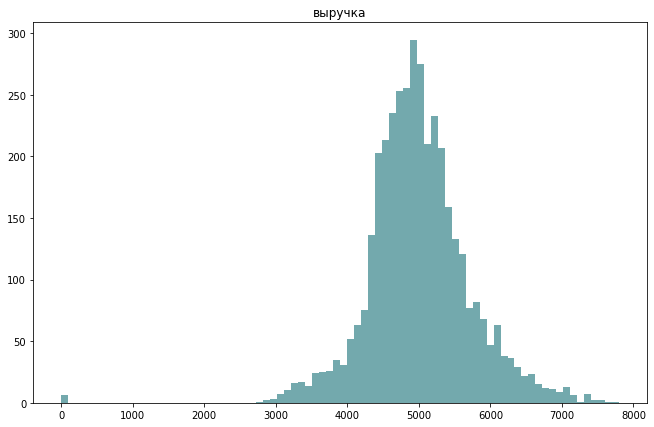

In [28]:
#визуализация
market_money[market_money.columns[market_money.columns != 'id']].hist(figsize=(11, 7), grid= False, color = '#73A9AD', bins='auto')
plt.show()

Признак Выручка распределен нормально.

In [29]:
market_time.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


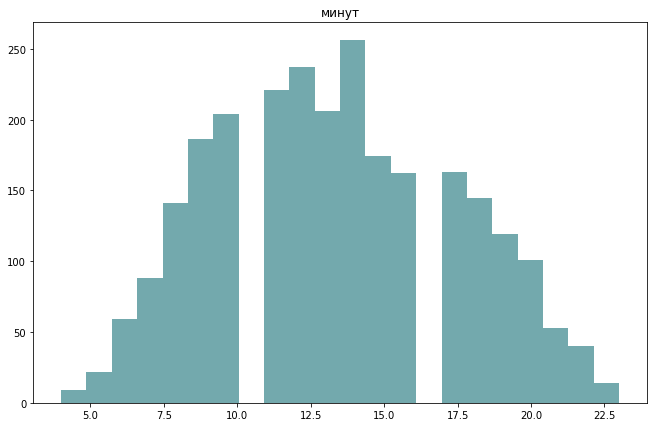

In [30]:
#визуализация
market_time[market_time.columns[market_time.columns != 'id']].hist(figsize=(11, 7), grid= False, color = '#73A9AD', bins='auto')
plt.show()

Признак Минут распределен нормально.

In [31]:
money.describe()

,id,прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


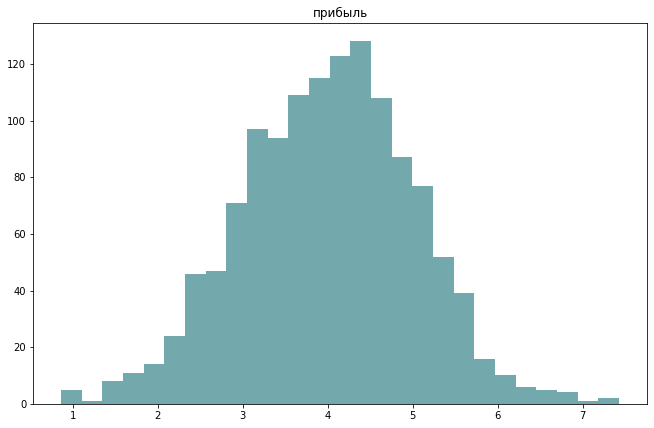

In [32]:
#визуализация
money[money.columns[money.columns != 'id']].hist(figsize=(11, 7), grid= False, color = '#73A9AD', bins='auto')
plt.show()

Признак Прибыль распределен нормально.

In [33]:
#для визуализации категориальных признаков необходимы круговые диаграммы, создадим функцию
def pie_graph(dataset, column, name, n, i):
    plt.subplot(1, n, i)
    plt.title(column)
    plt.pie(x=dataset.groupby(column)[name].count(),
            startangle=90,
            labeldistance=1.1, 
            wedgeprops={'linewidth':3, 'edgecolor':'white'}, 
            autopct='%1.1f%%',
            labels=dataset.groupby(column)[name].count().index, 
            colors=['#73A9AD', '#ff9999', '#996699', '#ffff99'])

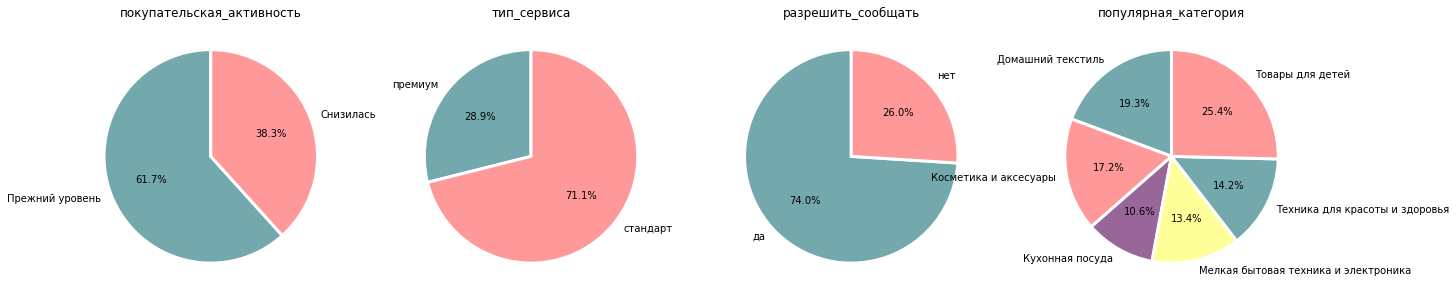

In [34]:
#визуализация
categorical_market_file = ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория']
i = 1
plt.figure(figsize=(22,14))
for name in categorical_market_file:
    pie_graph(market_file, name, 'id', len(categorical_market_file), i)
    i += 1

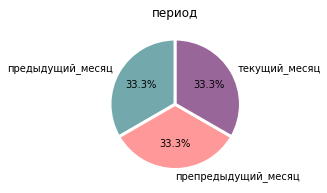

In [35]:
#визуализация категориального признака датасета market_money
categorical_market_money = ['период']
i = 1
plt.figure(figsize=(18,3))
for name in categorical_market_money:
    pie_graph(market_money, name, 'id', len(categorical_market_money), i)
    i += 1

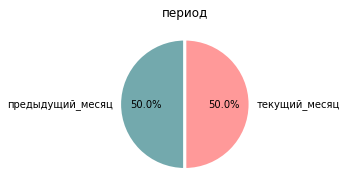

In [36]:
#визуализация категориального признака датасета market_time
categorical_market_time = ['период']
i = 1
plt.figure(figsize=(18,3))
for name in categorical_market_time:
    pie_graph(market_time, name, 'id', len(categorical_market_money), i)
    i += 1

Исходя из визуализации категориальных признаков,можем сделать вывод. У 38,3% покупателей снизилась покупательская активность, у 61,7%-осталась прежняя. 71,1% покупателей имеют уровень сервиса стандарт, 28,9%-премиум. 74% покупателей дали согласие на рассылку доп предложений. Самой популярной категорией товаров являеются Товары для детей (25,4%), далее по убыванию: домашний текстиль (19,3%), косметика и акссесуары (17,2%), техника для красоты и здоровья (14,2%), мелкая бытовая техника и электроника (13,4%) и кухонная посуда (10,6%). Выручка распределена одинаково за три периода: текущий, предыдущий и препредыдущие месяца.

In [37]:
#отберем клиентов с покупательской активностью не менее трёх месяцев
#для этого найдем клиентов,кто не покупал в течении трех последних месяцев
market_money.query('выручка == 0')

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


In [38]:
#неактивных пользователей необходимо убрать из всех датасетов, таким образом останутся только клиенты с покупательской активностью не менее трёх месяцев
market_file = market_file.query('id != [215348, 215357, 215359]')
market_money = market_money.query('id != [215348, 215357, 215359]')
market_time = market_time.query('id != [215348, 215357, 215359]')
money = money.query('id != [215348, 215357, 215359]')

In [39]:
#проверяем
market_file

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7


In [40]:
market_money

,id,период,выручка
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
...,...,...,...
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0


In [41]:
market_time

,id,период,минут
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдущий_месяц,8
6,215351,текущий_месяц,13
...,...,...,...
2595,216645,текущий_месяц,18
2596,216646,предыдущий_месяц,18
2597,216646,текущий_месяц,7
2598,216647,текущий_месяц,10


In [42]:
money

,id,прибыль
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
...,...,...
1295,216643,4.44
1296,216644,6.11
1297,216645,3.29
1298,216646,4.03


## Обьединение таблиц

In [43]:
#пивот таблицы market_money для создания отдельных столбцов
market_money_pivot = market_money.pivot(index='id', columns='период', values='выручка').reset_index()

#переименуем столбцы, чтобы было понятно, к какому периоду они относятся
market_money_pivot.columns.name = None  #удаляем название колонки
market_money_pivot.columns = ['id', 'выручка_текущий_месяц', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц']


In [44]:
#пивот таблицы market_time для создания отдельных столбцов
market_time_pivot = market_time.pivot(index='id', columns='период', values='минут').reset_index()

#переименуем столбцы
market_time_pivot.columns.name = None  #удаляем название колонки
market_time_pivot.columns = ['id', 'время_текущий_месяц', 'время_предыдущий_месяц']


In [45]:
#объединяем market_file с market_money_pivot и market_time_pivot по колонке 'id'
final_table = market_file.merge(market_money_pivot, on='id', how='left')
final_table = final_table.merge(market_time_pivot, on='id', how='left')
final_table

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,время_текущий_месяц,время_предыдущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1293,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1294,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1295,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


Таблицы обьединены.

## Корреляционный анализ

                                     маркет_актив_6_мес  маркет_актив_тек_мес  \
маркет_актив_6_мес                             1.000000              0.061697   
маркет_актив_тек_мес                           0.061697              1.000000   
длительность                                  -0.044614             -0.131979   
акционные_покупки                             -0.277968              0.033045   
средний_просмотр_категорий_за_визит            0.185027             -0.025158   
неоплаченные_продукты_штук_квартал            -0.134368              0.061754   
ошибка_сервиса                                 0.038656              0.087351   
страниц_за_визит                               0.319918              0.003144   
выручка_текущий_месяц                         -0.005652             -0.027107   
выручка_предыдущий_месяц                       0.233325             -0.039397   
выручка_препредыдущий_месяц                    0.002093             -0.011782   
время_текущий_месяц         

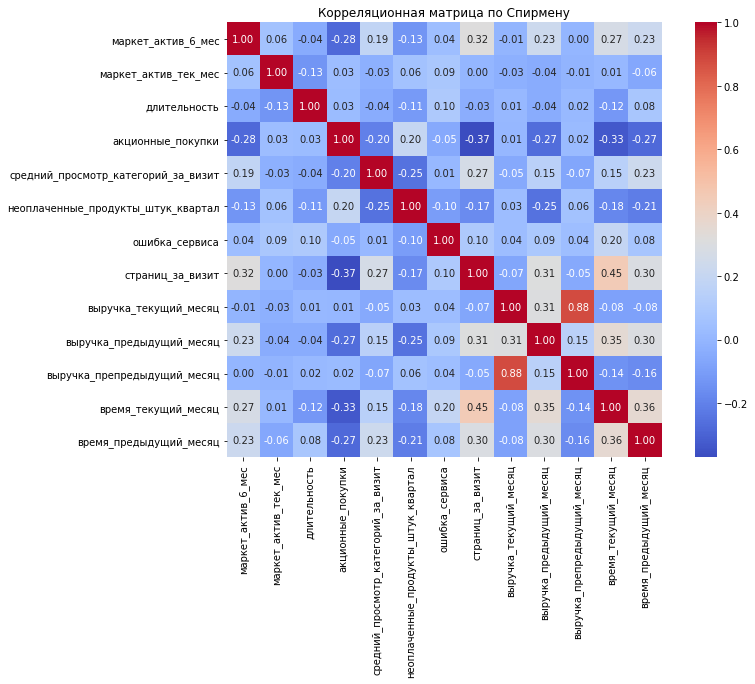

In [46]:
#выбираем признаки
quantitative_columns = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит',
    'выручка_текущий_месяц',
    'выручка_предыдущий_месяц',
    'выручка_препредыдущий_месяц',
    'время_текущий_месяц',
    'время_предыдущий_месяц'
]

#рассчитаем корреляцию по Спирмену
correlation_matrix = final_table[quantitative_columns].corr(method='spearman')

#корреляционная матрица
print(correlation_matrix)

#визуализация
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Корреляционная матрица по Спирмену")
plt.show()

Светлые тона говорят о сильной линейной зависимости, а тёмные — о слабой.

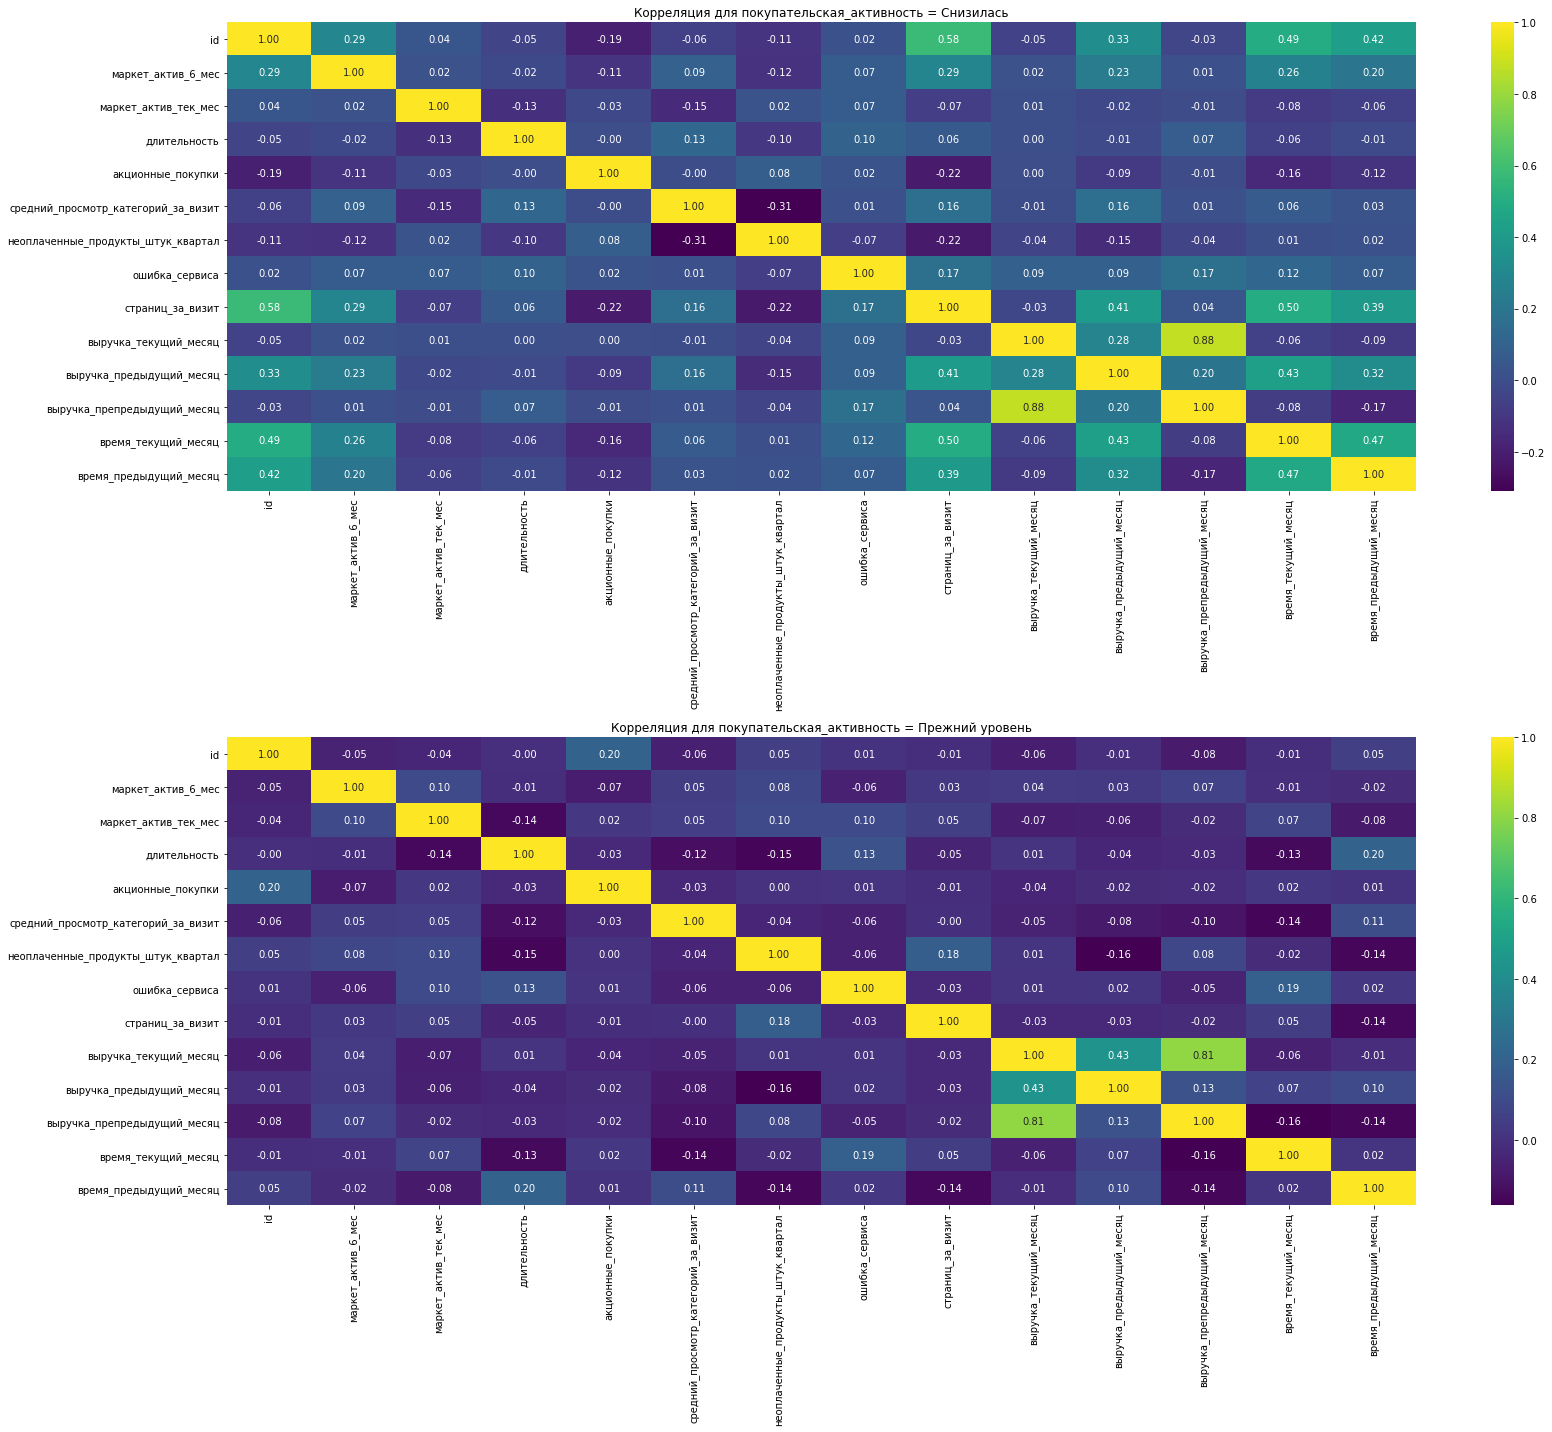

In [47]:
#создадим отдельные матрицы корреляции для значений целевого признака Покупательская активность
def build_target_correlation_matrix(df, target_col):
    unique_values = df[target_col].unique()
    fig, axs = plt.subplots(nrows=len(unique_values), figsize=(24, 10*len(unique_values)))

    for idx, value in enumerate(unique_values):
        subset = df[df[target_col] == value]
        corr_target = subset.corr()
        sns.heatmap(corr_target, annot=True, fmt='.2f', ax=axs[idx], cmap='viridis')
        axs[idx].set_title(f'Корреляция для {target_col} = {value}')

    plt.tight_layout()
    plt.show()

build_target_correlation_matrix(final_table, 'покупательская_активность')


In [48]:
#выявляем сильно коррелирующие признаки, порог=0,9
highly_correlated_pairs = []
threshold = 0.9
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

highly_correlated_pairs

[]

Выявлена корреляция между целевым признаком- Покупательская активность и признаками: Маркет_актив_6_мес, Акционные_покупки, Средний_просмотр_категорий_за_визит, Неоплаченные_продукты_штук_квартал, Страниц_за_визит, Выручка_препредыдущий_месяц, Время_предыдущий_месяц, Время_текущий_месяц. Значение корреляции выше допустимого (0,9) не выявлено.

## Использование пайплайнов

In [49]:
#подготовка данных
X = final_table.drop(columns=['id', 'покупательская_активность'])
y = final_table['покупательская_активность']

#разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#определение количественных и категориальных признаков
numeric_features = ['маркет_актив_6_мес', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'страниц_за_визит', 'выручка_текущий_месяц', 'выручка_предыдущий_месяц', 'время_текущий_месяц', 'время_предыдущий_месяц']
categorical_features = ['тип_сервиса', 'разрешить_сообщать', 'популярная_категория', 'ошибка_сервиса']

def create_pipeline(model):
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler()),  
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder()),   
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )
    
    return Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', model)])

models = {
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {'classifier__n_neighbors': [3, 5, 7, 9]}
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {'classifier__max_depth': [None, 10, 20, 30]}
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {'classifier__C': [0.001, 0.01, 0.1, 1, 10]}
    },
    'SVC': {
        'model': SVC(),
        'params': {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}
    },
    'DummyClassifier': {
        'model': DummyClassifier(strategy='most_frequent'),  #добавляем новую модель
        'params': {}
    }
}

best_model = None
best_accuracy = 0

for model_name, model_info in models.items():
    pipeline = create_pipeline(model_info['model'])
    grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    #оценка с использованием кросс-валидации
    cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
    mean_cv_score = cv_scores.mean()

    print(f'{model_name} Mean CV Accuracy: {mean_cv_score:.4f}')

    if mean_cv_score > best_accuracy:
        best_accuracy = mean_cv_score
        best_model = grid_search.best_estimator_

#финальная оценка на тестовом наборе
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Лучшая модель:", best_model)
print(f"Лучшая точность (кросс-валидация): {best_accuracy:.4f}")
print(f"Точность на тестовом наборе: {test_accuracy:.4f}")


KNeighborsClassifier Mean CV Accuracy: 0.8708
DecisionTreeClassifier Mean CV Accuracy: 0.8447
LogisticRegression Mean CV Accuracy: 0.8881
SVC Mean CV Accuracy: 0.8920
DummyClassifier Mean CV Accuracy: 0.6210
Лучшая модель: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['маркет_актив_6_мес',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'страниц_за_визит',
                                                   'выручка_текущий_месяц',
                                                   

Accuracy выбрана, так как:   
- Метрика проста и подходит для сравнения моделей.  
- Ошибки обоих типов равноценны для бизнеса.

## Анализ важности признаков

  0%|          | 0/100 [00:00<?, ?it/s]

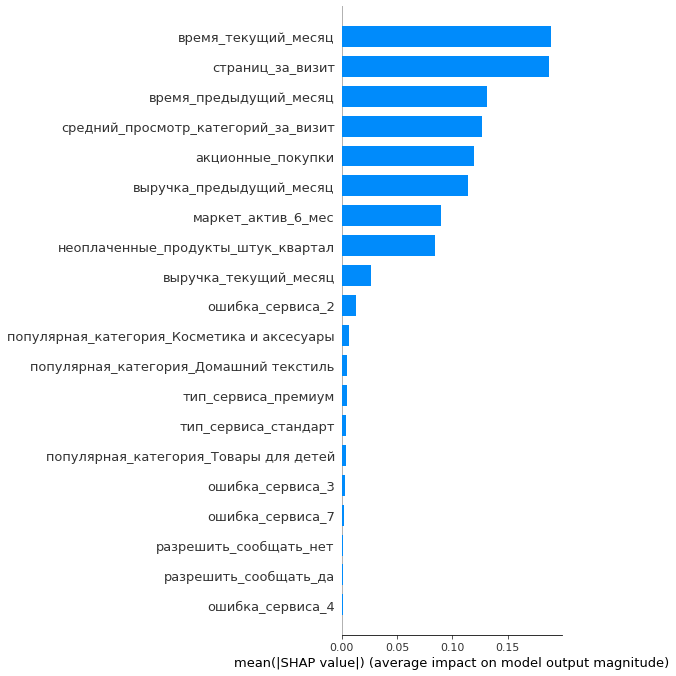

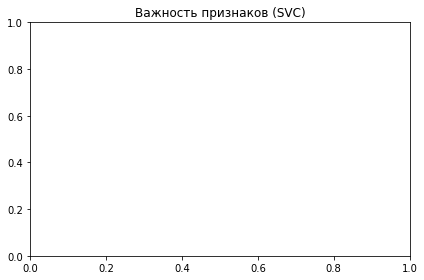

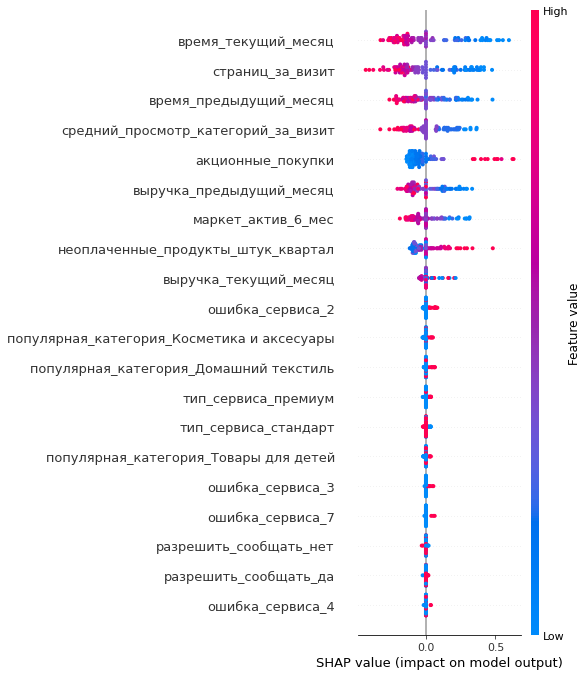

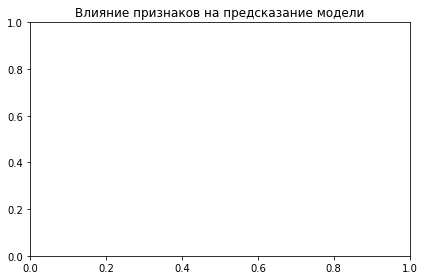


Топ-10 самых важных признаков:
                                Признак  Важность
7                   время_текущий_месяц  0.189297
4                      страниц_за_визит  0.187531
8                время_предыдущий_месяц  0.131479
2   средний_просмотр_категорий_за_визит  0.127184
1                     акционные_покупки  0.119694
6              выручка_предыдущий_месяц  0.114096
0                    маркет_актив_6_мес  0.090051
3    неоплаченные_продукты_штук_квартал  0.084666
5                 выручка_текущий_месяц  0.026676
21                     ошибка_сервиса_2  0.013126


In [50]:
#получаем лучшую модель
best_svc = best_model

#получаем имена признаков после OneHot-кодирования
onehot_encoder = best_svc.named_steps['preprocessor'] \
    .named_transformers_['cat'] \
    .named_steps['onehot']

cat_ohe_names = onehot_encoder.get_feature_names_out(categorical_features)

#собираем полный список имён признаков
feature_names = numeric_features + list(cat_ohe_names)

#трансформация признаков (преобразуем в dense если sparse)
X_transformed = best_svc.named_steps['preprocessor'].transform(X_train)
if hasattr(X_transformed, 'toarray'):
    X_transformed = X_transformed.toarray()

#выбираем часть выборки для SHAP (100 случайных примеров)
X_sample = shap.sample(X_transformed, 100, random_state=42)

#для SVC используем decision_function вместо predict_proba
def model_predict(X):
    return best_svc.named_steps['classifier'].decision_function(X)

#запуск KernelExplainer
explainer = shap.KernelExplainer(model_predict, X_sample)
shap_values = explainer.shap_values(X_sample)

#визуализация важности признаков
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_sample, feature_names=feature_names, plot_type="bar")
plt.title("Важность признаков (SVC)")
plt.tight_layout()
plt.show()

#более детальная визуализация
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_sample, feature_names=feature_names, plot_type="dot")
plt.title("Влияние признаков на предсказание модели")
plt.tight_layout()
plt.show()

#вывод средних абсолютных значений SHAP
shap_df = pd.DataFrame({
    'Признак': feature_names,
    'Важность': np.abs(shap_values).mean(axis=0)
}).sort_values('Важность', ascending=False)

print("\nТоп-10 самых важных признаков:")
print(shap_df.head(10))

*Топ самых важных признаков:*  
*Время в текущем месяце* (0.189) – главный индикатор. Падение активности = риск оттока.  
*Страниц за визит* (0.187) – меньше просмотров = меньше вовлеченности.  
*Время в предыдущем месяце* (0.130) – сравнение с предыдущим периодом важно.  
*Акционные_покупки*  - частые покупки по акциям -риск снижения активности, так как клиенты могут быть "перекормлены" скидками.

**Вывод:** Сфокусироваться на клиентах с одновременным падением времени активности и просмотров страниц.

## Сегментация покупателей

In [51]:
#проверяем, что вероятность соответствует классу "снизилась"
#убедимся, что классы в модели соответствуют нашим ожиданиям
class_labels = best_model.named_steps['classifier'].classes_
print(f"Метки классов модели: {class_labels}")

#проверяем, что первый класс соответствует "не снизилась", а второй - "снизилась"
if len(class_labels) != 2:
    raise ValueError("Модель должна быть бинарным классификатором")

#определяем индекс класса "снизилась"
class_mapping = {'не снизилась': 0, 'снизилась': 1}  # Уточните ваши метки классов
target_class_idx = class_mapping['снизилась']

Метки классов модели: ['Прежний уровень' 'Снизилась']


In [52]:
#добавляем в итоговую таблицу данные о прибыли из таблицы money
final_table_with_profit = final_table.merge(money, on='id', how='left')

#добавляем предсказанную вероятность снижения активности
#для SVC включаем probability=True, если еще не включено
if isinstance(best_model.named_steps['classifier'], SVC):
    if not best_model.named_steps['classifier'].probability:
        print("Включаем расчет вероятностей для SVC...")
        best_model.named_steps['classifier'].probability = True
        best_model.fit(X_train, y_train)  

final_table_with_profit['probability_churn'] = best_model.predict_proba(X)[:, target_class_idx]

#определяем пороговые значения
PROBABILITY_THRESHOLD = 0.7  #порог высокой вероятности снижения активности
PROFIT_THRESHOLD = final_table_with_profit['прибыль'].quantile(0.75)  #используем 75-й перцентиль прибыли

#выделяем целевой сегмент
high_risk_high_profit = final_table_with_profit[
    (final_table_with_profit['probability_churn'] > PROBABILITY_THRESHOLD) &
    (final_table_with_profit['прибыль'] > PROFIT_THRESHOLD)
].sort_values(
    by=['probability_churn', 'прибыль'], 
    ascending=[False, False]
).reset_index(drop=True)

#анализ результатов
print("\nАнализ сегментации:")
print(f"Всего клиентов в базе: {len(final_table_with_profit)}")
print(f"Клиентов с риском снижения > {PROBABILITY_THRESHOLD:.0%}: {len(final_table_with_profit[final_table_with_profit['probability_churn'] > PROBABILITY_THRESHOLD])}")
print(f"Клиентов с прибылью > {PROFIT_THRESHOLD:.2f} (порог): {len(final_table_with_profit[final_table_with_profit['прибыль'] > PROFIT_THRESHOLD])}")
print(f"\nЦелевой сегмент (высокий риск + высокая прибыль): {len(high_risk_high_profit)} клиентов")
print(f"Доля от общей базы: {len(high_risk_high_profit)/len(final_table_with_profit):.1%}")

Включаем расчет вероятностей для SVC...

Анализ сегментации:
Всего клиентов в базе: 1297
Клиентов с риском снижения > 70%: 388
Клиентов с прибылью > 4.67 (порог): 323

Целевой сегмент (высокий риск + высокая прибыль): 88 клиентов
Доля от общей базы: 6.8%


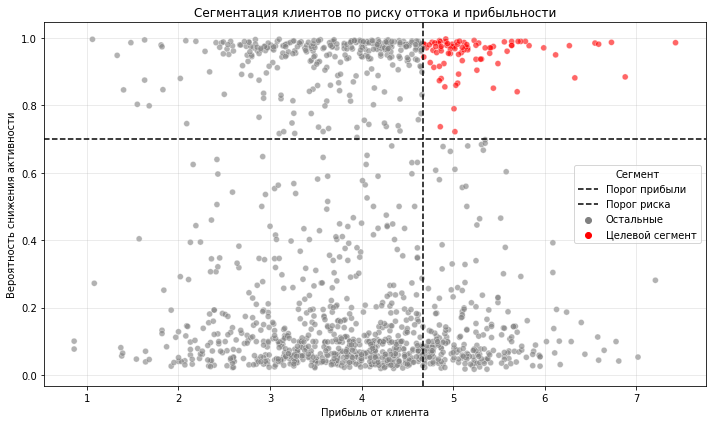

In [53]:
#визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=final_table_with_profit,
    x='прибыль',
    y='probability_churn',
    hue=np.where(
        (final_table_with_profit['probability_churn'] > PROBABILITY_THRESHOLD) & 
        (final_table_with_profit['прибыль'] > PROFIT_THRESHOLD),
        'Целевой сегмент', 'Остальные'
    ),
    palette={'Целевой сегмент': 'red', 'Остальные': 'gray'},
    alpha=0.6
)
plt.axvline(PROFIT_THRESHOLD, color='black', linestyle='--', label='Порог прибыли')
plt.axhline(PROBABILITY_THRESHOLD, color='black', linestyle='--', label='Порог риска')
plt.title('Сегментация клиентов по риску оттока и прибыльности')
plt.xlabel('Прибыль от клиента')
plt.ylabel('Вероятность снижения активности')
plt.legend(title='Сегмент')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Сегмент: 88 клиентов с высокой прибылью,но риском снижения активности.

Описательная статистика количественных признаков:


,count,mean,std,min,25%,50%,75%,max
маркет_актив_6_мес,88.0,3.46,0.98,0.90,2.98,3.55,4.10,5.60
акционные_покупки,88.0,0.45,0.29,0.12,0.24,0.32,0.40,0.99
средний_просмотр_категорий_за_визит,88.0,2.35,1.06,1.00,2.00,2.00,3.00,6.00
неоплаченные_продукты_штук_квартал,88.0,4.05,2.15,0.00,2.00,4.00,5.25,10.00
страниц_за_визит,88.0,4.15,1.90,1.00,3.00,4.00,5.00,11.00
выручка_текущий_месяц,88.0,4897.98,816.37,2909.00,4245.88,5039.00,5549.75,6227.00
выручка_предыдущий_месяц,88.0,4565.62,225.25,4119.00,4409.75,4582.00,4740.00,4990.00
время_текущий_месяц,88.0,9.67,2.24,5.00,8.00,10.00,11.00,16.00
время_предыдущий_месяц,88.0,9.95,2.29,5.00,8.75,10.00,12.00,15.00


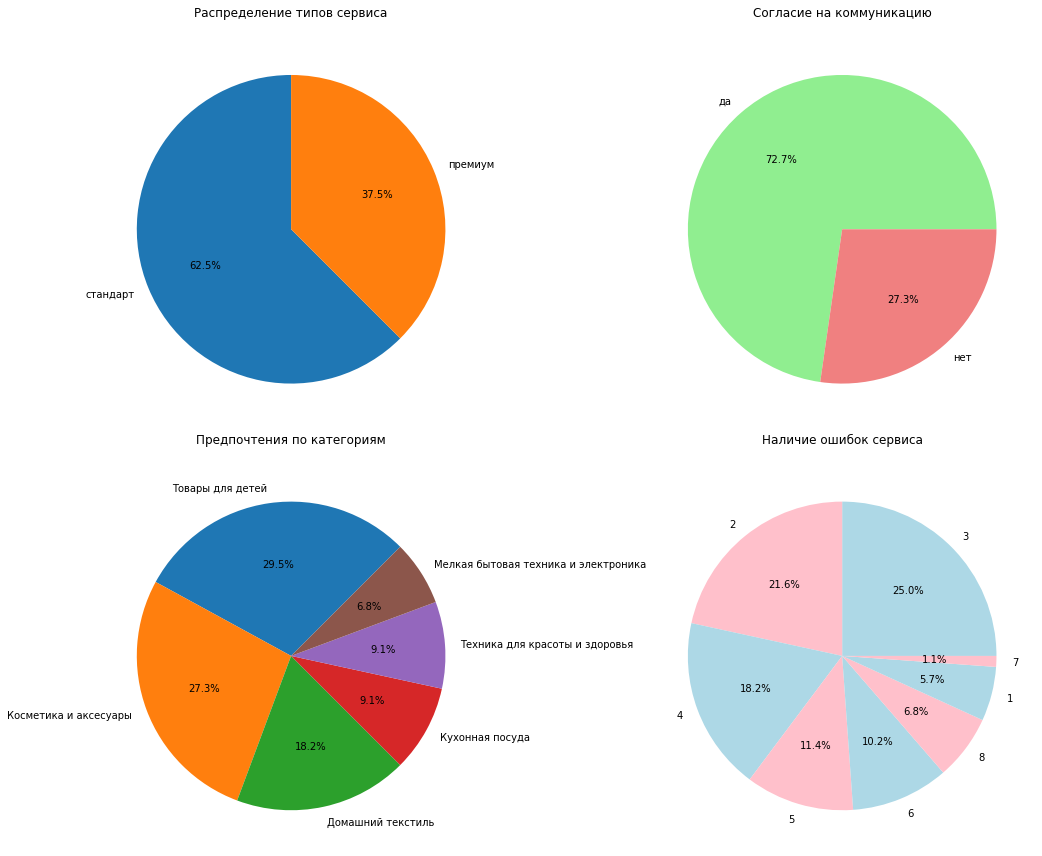


Подробная статистика по категориальным признакам:

тип_сервиса:


,Количество,Процент
стандарт,55,62.5
премиум,33,37.5



разрешить_сообщать:


,Количество,Процент
да,64,72.7
нет,24,27.3



популярная_категория:


,Количество,Процент
Товары для детей,26,29.5
Косметика и аксесуары,24,27.3
Домашний текстиль,16,18.2
Кухонная посуда,8,9.1
Техника для красоты и здоровья,8,9.1
Мелкая бытовая техника и электроника,6,6.8



ошибка_сервиса:


,Количество,Процент
3,22,25.0
2,19,21.6
4,16,18.2
5,10,11.4
6,9,10.2
8,6,6.8
1,5,5.7
7,1,1.1



Средняя прибыль по категориям:

По признаку 'тип_сервиса':


,count,mean,std,min,25%,50%,75%,max
тип_сервиса,,,,,,,,
премиум,33.0,5.38,0.60,4.68,5.01,5.25,5.56,7.43
стандарт,55.0,5.17,0.48,4.68,4.86,5.01,5.26,6.73



По признаку 'разрешить_сообщать':


,count,mean,std,min,25%,50%,75%,max
разрешить_сообщать,,,,,,,,
да,64.0,5.22,0.52,4.68,4.91,5.06,5.42,7.43
нет,24.0,5.32,0.59,4.68,4.86,5.20,5.46,6.73



По признаку 'популярная_категория':


,count,mean,std,min,25%,50%,75%,max
популярная_категория,,,,,,,,
Домашний текстиль,16.0,5.01,0.19,4.69,4.89,4.96,5.11,5.44
Косметика и аксесуары,24.0,5.42,0.70,4.78,4.97,5.18,5.51,7.43
Кухонная посуда,8.0,5.14,0.34,4.74,4.92,5.08,5.28,5.64
Мелкая бытовая техника и электроника,6.0,4.91,0.22,4.68,4.78,4.84,5.04,5.25
Техника для красоты и здоровья,8.0,5.28,0.55,4.71,5.00,5.06,5.35,6.27
Товары для детей,26.0,5.35,0.55,4.68,4.92,5.18,5.63,6.73



По признаку 'ошибка_сервиса':


,count,mean,std,min,25%,50%,75%,max
ошибка_сервиса,,,,,,,,
1,5.0,5.10,0.32,4.81,4.93,4.99,5.14,5.64
2,19.0,5.23,0.46,4.69,4.86,5.12,5.44,6.33
3,22.0,5.31,0.64,4.79,4.92,5.10,5.34,7.43
4,16.0,5.27,0.49,4.85,4.96,5.04,5.57,6.59
5,10.0,5.32,0.55,4.68,4.97,5.10,5.63,6.55
6,9.0,5.37,0.76,4.75,4.84,5.02,5.64,6.88
7,1.0,5.16,NaN,5.16,5.16,5.16,5.16,5.16
8,6.0,4.92,0.24,4.68,4.73,4.89,5.07,5.28


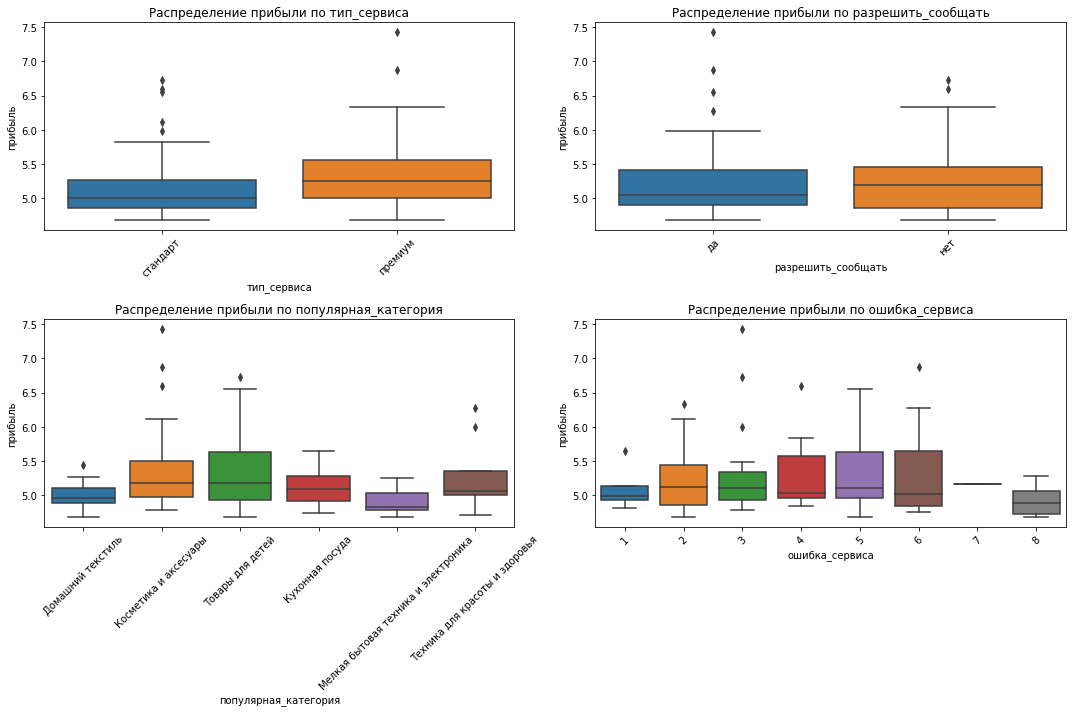

In [54]:
#описательная статистика количественных признаков
print("Описательная статистика количественных признаков:")
display(high_risk_high_profit[numeric_features].describe().T.round(2))

#анализ категориальных признаков с визуализацией
plt.figure(figsize=(15, 12))

#распределение типов сервиса
plt.subplot(2, 2, 1)
type_service_dist = high_risk_high_profit['тип_сервиса'].value_counts(normalize=True)
type_service_dist.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Распределение типов сервиса', pad=20)
plt.ylabel('')

#согласие на рассылку
plt.subplot(2, 2, 2)
subscribe_dist = high_risk_high_profit['разрешить_сообщать'].value_counts(normalize=True)
subscribe_dist.plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Согласие на коммуникацию', pad=20)
plt.ylabel('')

#популярные категории
plt.subplot(2, 2, 3)
category_dist = high_risk_high_profit['популярная_категория'].value_counts(normalize=True)
category_dist.plot.pie(autopct='%1.1f%%', startangle=45)
plt.title('Предпочтения по категориям', pad=20)
plt.ylabel('')

#ошибки сервиса
plt.subplot(2, 2, 4)
errors_dist = high_risk_high_profit['ошибка_сервиса'].value_counts(normalize=True)
errors_dist.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Наличие ошибок сервиса', pad=20)
plt.ylabel('')

plt.tight_layout()
plt.show()

#подробный анализ по категориям
print("\nПодробная статистика по категориальным признакам:")
for feature in categorical_features:
    print(f"\n{feature}:")
    dist = high_risk_high_profit[feature].value_counts(dropna=False)
    dist_pct = high_risk_high_profit[feature].value_counts(normalize=True, dropna=False).mul(100).round(1)
    display(pd.concat([dist, dist_pct], axis=1, keys=['Количество', 'Процент']))

#анализ прибыли по категориям
print("\nСредняя прибыль по категориям:")
for feature in categorical_features:
    print(f"\nПо признаку '{feature}':")
    display(high_risk_high_profit.groupby(feature)['прибыль'].describe().round(2))

#визуализация прибыли по категориям
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=high_risk_high_profit, x=feature, y='прибыль')
    plt.title(f'Распределение прибыли по {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

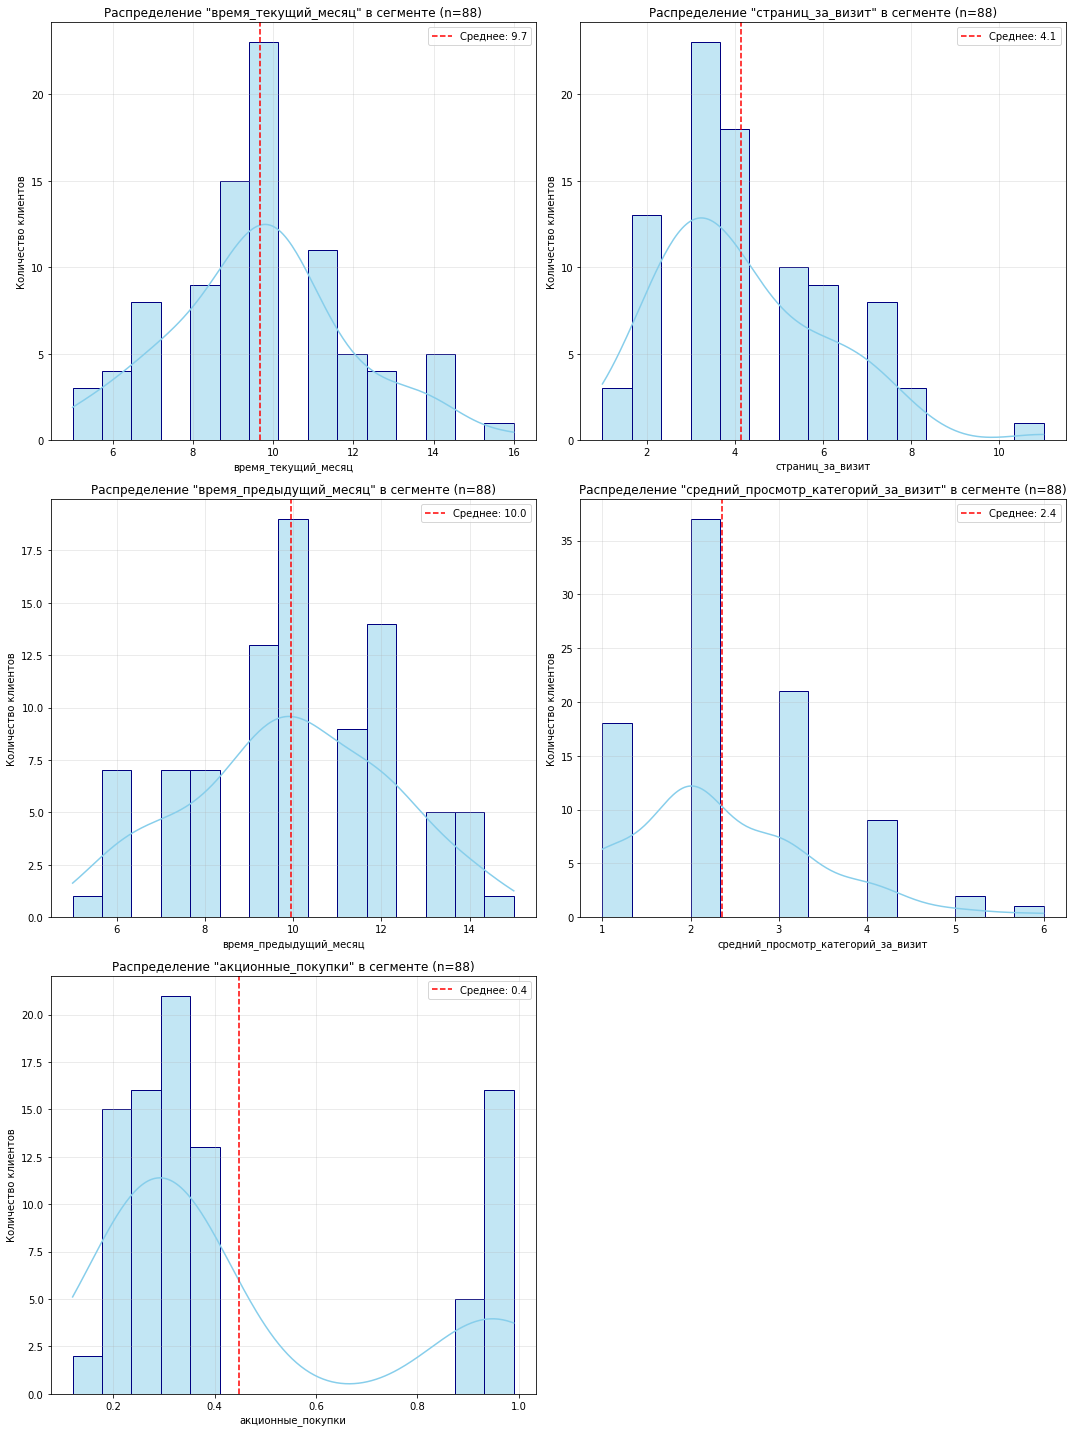

In [55]:
#список признаков по важности SHAP
top_features = [
    'время_текущий_месяц',
    'страниц_за_визит',
    'время_предыдущий_месяц',
    'средний_просмотр_категорий_за_визит',
        'акционные_покупки'
]
#гистограммы распределения ключевых признаков с расширенным анализом
plt.figure(figsize=(15, 20))
for i, feature in enumerate(top_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(
        high_risk_high_profit[feature], 
        bins=15, 
        kde=True, 
        color='skyblue',
        edgecolor='navy'
    )
    plt.axvline(
        high_risk_high_profit[feature].mean(), 
        color='red', 
        linestyle='--', 
        label=f'Среднее: {high_risk_high_profit[feature].mean():.1f}'
    )
    plt.title(f'Распределение "{feature}" в сегменте (n={len(high_risk_high_profit)})')
    plt.xlabel(feature)
    plt.ylabel('Количество клиентов')
    plt.legend()
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

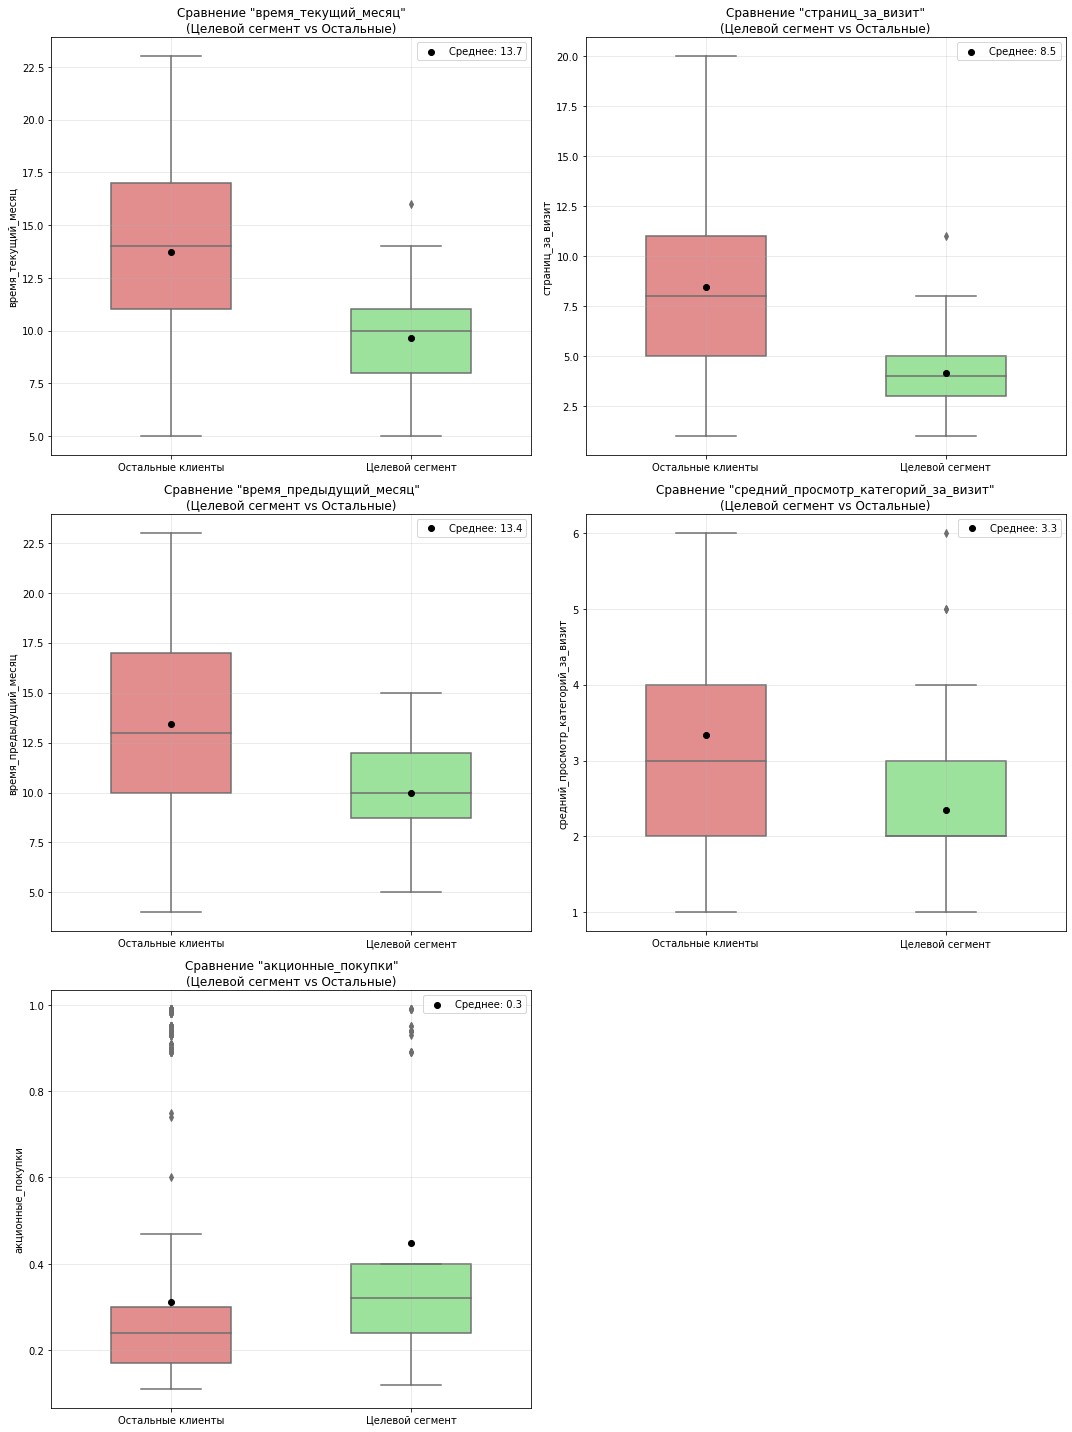

In [56]:
#сравнительный анализ с другими клиентами
if 'сегмент' not in final_table_with_profit.columns:
    final_table_with_profit['сегмент'] = final_table_with_profit['id'].isin(high_risk_high_profit['id']).map(
        {True: 'Целевой сегмент', False: 'Остальные клиенты'}
    )

#сравнительные boxplot с статистической значимостью
plt.figure(figsize=(15, 20))
for i, feature in enumerate(top_features, 1):
    plt.subplot(3, 2, i)
    
#Boxplot с улучшенным оформлением
    sns.boxplot(
        x='сегмент', 
        y=feature, 
        data=final_table_with_profit, 
        palette=['lightcoral', 'lightgreen'],
        width=0.5
    )
    
#добавляем средние значения
    means = final_table_with_profit.groupby('сегмент')[feature].mean()
    for j, m in enumerate(means):
        plt.scatter(j, m, color='black', zorder=5, label=f'Среднее: {m:.1f}' if j == 0 else "")
    
    plt.title(f'Сравнение "{feature}"\n(Целевой сегмент vs Остальные)')
    plt.xlabel('')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Выводы**: 
1. *Время активности (текущий и предыдущий месяц)*  
   - *Целевой сегмент* (риск оттока) показывает *ниже средние значения* времени активности (13.7 и 13.4) по сравнению с остальными клиентами.  
   - *Вывод:* Клиенты, снижающие активность (меньше времени в сервисе), склонны к уходу.  

2. *Страниц за визит*  
   - *Целевой сегмент* имеет *меньшее среднее значение (8.5)*, чем остальные клиенты.  
   - *Вывод:* Клиенты, просматривающие меньше страниц за визит, чаще попадают в группу риска.  

3. *Акционные покупки*  
   - *Целевой сегмент* имеет *низкий средний показатель (0.3)*, что говорит о слабой вовлеченности в акции.  
   - *Вывод:* Клиенты, не реагирующие на акции, могут терять интерес к сервису.  

4. *Средний просмотр категорий за визит*  
   - *Целевой сегмент* показывает *меньшее разнообразие (3.3)* в выборе категорий.  
   - *Вывод:* Клиенты, ограничивающие круг просматриваемых категорий, чаще уходят.  

 *Для удержания клиентов:*  
- *Стимулировать активность* (увеличивать время в сервисе через персонализированный контент).  
- *Расширять охват категорий* (рекомендации на основе поведения).  
- *Проверить вовлеченность в акции* – возможно, нужны более релевантные предложения.

## Общий вывод

Нами была проведена работа. Исходные данные загружены. Названия столбцов совпадают с описанием. Пропусков нет. Выполнена предобработка. Названия столбцов можно оставить кириллическими по заданию. Исправлены дубликаты,опечатки.  В ходе исследовательского анализа выявлено нормальное распределение Признаков: Маркет_актив_6_мес, Длительность, Средний_просмотр_категорий_за_визит, Ошибка_сервиса, Страниц_за_визит, Маркет_актив_тек_мес. Признаки Маркет_актив_тек_мес, Неоплаченные_продукты_штук_квартал и Ошибка_сервиса в дальнейшем можем преобразовать в категориальные. 

По визуализации признака Акционные_покупки можем сделать предположение, что довольно большая доля покупателей покупает товары именно по акции. Исходя из визуализации категориальных признаков,можем сделать вывод: 38,3% покупателей снизилась покупательская активность, у 61,7%-осталась прежняя. 71,1% покупателей имеют уровень сервиса стандарт, 28,9%-премиум. 74% покупателей дали согласие на рассылку доп предложений. Самой популярной категорией товаров являеются Товары для детей (25,4%), далее по убыванию: домашний текстиль (19,3%), косметика и акссесуары (17,2%), техника для красоты и здоровья (14,2%), мелкая бытовая техника и электроника (13,4%) и кухонная посуда (10,6%). Выручка распределена одинаково за три периода: текущий, предыдущий и препредыдущие месяца. 

Выявлена корреляция между целевым признаком- Покупательская активность и признаками: Маркет_актив6мес, Акционные_покупки, Средний_просмотр_категорий_за_визит, Неоплаченные_продукты_штук_квартал, Страниц_за_визит, Выручка_препредыдущий_месяц, Время_предыдущий_месяц, Время_текущий_месяц. Значение корреляции выше допустимого (0,9) не выявлено. 

В ходе исследования найдена и обучена лучшая модель для определения снижения активности покупателей сервиса. 

На основе SHAP-анализа можно сделать выводы о наиболее влиятельных признаках. Это:время_текущий_месяц, страниц_за_визит, время_предыдущий_месяц, средний_просмотр_категорий_за_визит, акционные_покупки. 

Выделен сегмент: 88 клиентов с высокой прибылью,но риском снижения активности. Проведено графическое и аналитическое исследование групп покупателей и сделаны выводы:
1. *Время активности (текущий и предыдущий месяц)*  
   - *Целевой сегмент* (риск оттока) показывает *ниже средние значения* времени активности (13.7 и 13.4) по сравнению с остальными клиентами.  
   - *Вывод:* Клиенты, снижающие активность (меньше времени в сервисе), склонны к уходу.  

2. *Страниц за визит*  
   - *Целевой сегмент* имеет *меньшее среднее значение (8.5)*, чем остальные клиенты.  
   - *Вывод:* Клиенты, просматривающие меньше страниц за визит, чаще попадают в группу риска.  

3. *Акционные покупки*  
   - *Целевой сегмент* имеет *низкий средний показатель (0.3)*, что говорит о слабой вовлеченности в акции.  
   - *Вывод:* Клиенты, не реагирующие на акции, могут терять интерес к сервису.  

4. *Средний просмотр категорий за визит*  
   - *Целевой сегмент* показывает *меньшее разнообразие (3.3)* в выборе категорий.  
   - *Вывод:* Клиенты, ограничивающие круг просматриваемых категорий, чаще уходят.  

 *Для удержания клиентов:*  
- *Стимулировать активность* (увеличивать время в сервисе через персонализированный контент).  
- *Расширять охват категорий* (рекомендации на основе поведения).  
- *Проверить вовлеченность в акции* – возможно, нужны более релевантные предложения.

Ключевые точки роста: персонализация, упрощение процессов, таргетированный маркетинг.